In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time
import random
from sklearn.model_selection import GridSearchCV

# Đọc dữ liệu
final_data = pd.read_csv("final_data.csv")  # Final data cho tập huấn luyện
dataset_1 = pd.read_csv("dataset_1.csv")    # Dataset 1 cho tập kiểm tra

# Tách đặc trưng và nhãn cho final data (train)
X_train = final_data.drop(columns=["SARS-Cov-2 exam result"])
y_train = final_data["SARS-Cov-2 exam result"]

# Tách đặc trưng và nhãn cho dataset_1 (test)
X_test = dataset_1.drop(columns=["SARS-Cov-2 exam result"])
y_test = dataset_1["SARS-Cov-2 exam result"]

# Chuẩn hóa dữ liệuw
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dataset_1

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
0,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1.0
1,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0
2,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1.0
3,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,1.0
4,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,19,0,0,0,0,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,0.0
598,19,0,0,0,0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,0.0
599,15,0,0,0,0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,0.0
600,17,0,0,0,0,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160,0.0


### Chạy với mô hình cơ bản

In [6]:
# Khởi tạo các mô hình cơ bản
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs', C=1.0, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss')
}

# Container để lưu kết quả
results = []

# Huấn luyện và đánh giá các mô hình
for model_name, model in models.items():    
    start_time = time.time()

    # Huấn luyện mô hình trên dữ liệu kết hợp
    model.fit(X_train_scaled, y_train)

    # Dự đoán trên dữ liệu real (test)
    predictions = model.predict(X_test_scaled)

    # Tính toán các chỉ số
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    elapsed_time = time.time() - start_time

    # Lưu kết quả cho mỗi mô hình
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Time (s)": elapsed_time
    })

# Chuyển kết quả thành DataFrame và in ra
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  Time (s)
0  Logistic Regression  0.868771   0.515385  0.807229  0.081566
1        Random Forest  0.978405   0.937500  0.903614  0.421072
2              XGBoost  0.981728   0.950000  0.915663  0.145031


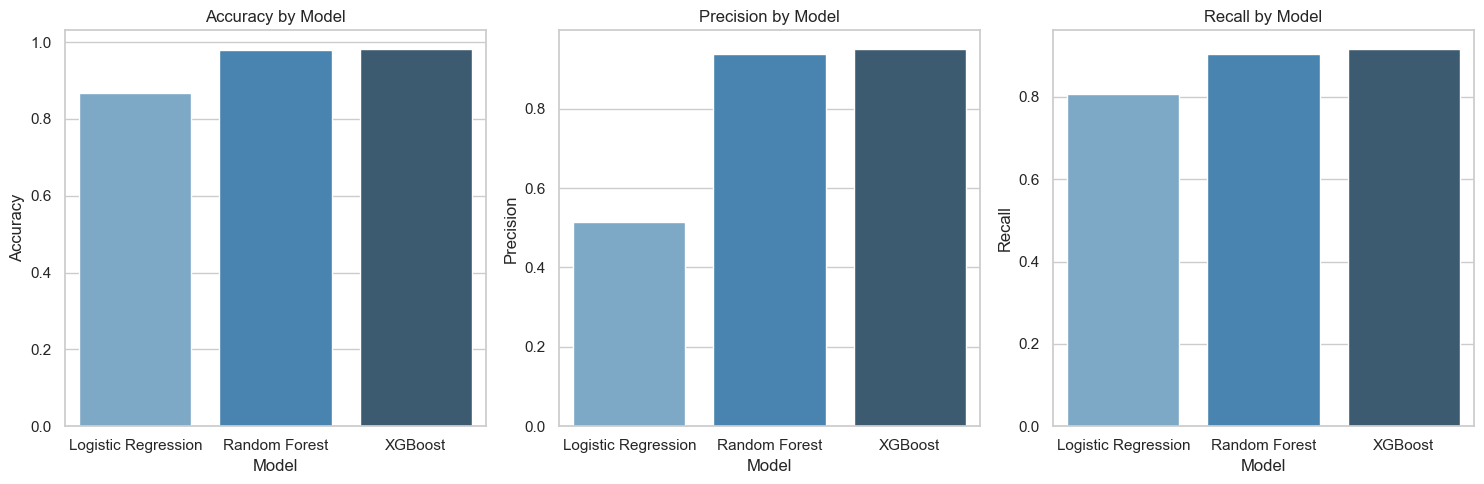

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

# Tạo biểu đồ cho Accuracy, Precision, Recall
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Chuyển lưới thành 1 hàng, 3 cột

# Biểu đồ Accuracy
sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0], hue='Model', palette="Blues_d")
axes[0].set_title('Accuracy by Model')

# Biểu đồ Precision
sns.barplot(x='Model', y='Precision', data=results_df, ax=axes[1], hue='Model', palette="Blues_d")
axes[1].set_title('Precision by Model')

# Biểu đồ Recall
sns.barplot(x='Model', y='Recall', data=results_df, ax=axes[2], hue='Model', palette="Blues_d")
axes[2].set_title('Recall by Model')

# Tinh chỉnh bố cục
plt.tight_layout()
plt.show()

### Chạy với CL

In [8]:
# Cài đặt Replay Buffer
class ReplayBuffer:
    def __init__(self, max_size=1000):
        self.max_size = max_size
        self.buffer = []

    def store(self, data, label, model=None):
        if model is not None:
            # Ưu tiên lưu các mẫu khó phân loại
            pred = model.predict([data])
            if pred != label:  # Chỉ lưu các mẫu phân loại sai
                self._add_to_buffer(data, label)
        else:
            self._add_to_buffer(data, label)

    def _add_to_buffer(self, data, label):
        if len(self.buffer) >= self.max_size:
            self.buffer.pop(0)
        self.buffer.append((data, label))
    
    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

# Hàm tính Fisher Information cho mô hình
def compute_fisher_information(model, X_batch, y_batch):
    model.fit(X_batch, y_batch)  # Huấn luyện mô hình trên batch
    grad = np.array(model.coef_)  # Lấy gradient của trọng số
    fisher_information = np.abs(grad) ** 2  # Fisher Information Matrix ổn định hơn
    return fisher_information

# Hàm tính EWC Loss
def ewc_loss(model, fisher_information, previous_params, lambda_ewc=1.0):  # Tăng lambda
    current_params = np.array(model.coef_)
    return lambda_ewc * np.sum(fisher_information * (current_params - previous_params) ** 2)

# Khởi tạo các mô hình
logreg_model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs', C=1.0, class_weight='balanced')
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Tạo DataFrame để lưu kết quả
logreg_results = {
    "Batch": [], "Accuracy": [], "Precision": [], "Recall": [], "Forgetting Rate": [], "Time (s)": []
}
rf_results = {
    "Batch": [], "Accuracy": [], "Precision": [], "Recall": [], "Forgetting Rate": [], "Time (s)": []
}
xgb_results = {
    "Batch": [], "Accuracy": [], "Precision": [], "Recall": [], "Forgetting Rate": [], "Time (s)": []
}

# Khởi tạo Replay Buffer
batch_size = 64
num_batches = int(np.ceil(len(X_train_scaled) / batch_size))
replay_buffer = ReplayBuffer(max_size=500)

# Tổng thời gian cho từng mô hình
total_time_logreg = 0
total_time_rf = 0
total_time_xgb = 0

# Khởi tạo mô hình lần đầu tiên 
logreg_model.fit(X_train_scaled[:batch_size], y_train[:batch_size])
rf_model.fit(X_train_scaled[:batch_size], y_train[:batch_size])
xgb_model.fit(X_train_scaled[:batch_size], y_train[:batch_size])

# Lưu trọng số ban đầu
previous_params_logreg = np.array(logreg_model.coef_)
previous_params_rf = np.array(rf_model.feature_importances_)
previous_params_xgb = xgb_model.get_booster().get_dump()[0]  # Lưu trọng số XGBoost

# Huấn luyện và đánh giá mô hình với Replay Buffer và EWC
for batch in range(num_batches):
    # Lấy batch dữ liệu
    X_batch = X_train_scaled[batch * batch_size:(batch + 1) * batch_size]
    y_batch = y_train[batch * batch_size:(batch + 1) * batch_size]

    # Kiểm tra nếu batch chỉ có một lớp
    unique_classes = np.unique(y_batch)
    if len(unique_classes) < 2:
        print(f"Skipping batch {batch + 1} due to insufficient classes.")
        continue

    # Training và đánh giá Logistic Regression
    start_time = time.time()
    logreg_model.fit(X_batch, y_batch)
    
    fisher_info_logreg = compute_fisher_information(logreg_model, X_batch, y_batch)
    ewc_loss_logreg = ewc_loss(logreg_model, fisher_info_logreg, previous_params_logreg)
    logreg_model.coef_ -= ewc_loss_logreg  # Cập nhật trọng số với EWC loss

    y_pred_logreg = logreg_model.predict(X_test_scaled)
    end_time = time.time()
    batch_time_logreg = end_time - start_time
    total_time_logreg += batch_time_logreg

    accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
    precision_logreg = precision_score(y_test, y_pred_logreg)
    recall_logreg = recall_score(y_test, y_pred_logreg)
    if batch == 0:
        prev_accuracy_logreg = accuracy_logreg
    forgetting_rate_logreg = prev_accuracy_logreg - accuracy_logreg
    prev_accuracy_logreg = accuracy_logreg

    logreg_results["Batch"].append(batch + 1)
    logreg_results["Accuracy"].append(accuracy_logreg)
    logreg_results["Precision"].append(precision_logreg)
    logreg_results["Recall"].append(recall_logreg)
    logreg_results["Forgetting Rate"].append(forgetting_rate_logreg)
    logreg_results["Time (s)"].append(batch_time_logreg)
    
    # Training và đánh giá Random Forest
    start_time = time.time()
    rf_model.fit(X_batch, y_batch)
    y_pred_rf = rf_model.predict(X_test_scaled)
    end_time = time.time()
    batch_time_rf = end_time - start_time
    total_time_rf += batch_time_rf

    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf)
    recall_rf = recall_score(y_test, y_pred_rf)
    if batch == 0:
        prev_accuracy_rf = accuracy_rf
    forgetting_rate_rf = prev_accuracy_rf - accuracy_rf
    prev_accuracy_rf = accuracy_rf

    rf_results["Batch"].append(batch + 1)
    rf_results["Accuracy"].append(accuracy_rf)
    rf_results["Precision"].append(precision_rf)
    rf_results["Recall"].append(recall_rf)
    rf_results["Forgetting Rate"].append(forgetting_rate_rf)
    rf_results["Time (s)"].append(batch_time_rf)

    # Training và đánh giá XGBoost
    start_time = time.time()
    xgb_model.fit(X_batch, y_batch)
    y_pred_xgb = xgb_model.predict(X_test_scaled)
    end_time = time.time()
    batch_time_xgb = end_time - start_time
    total_time_xgb += batch_time_xgb

    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    precision_xgb = precision_score(y_test, y_pred_xgb)
    recall_xgb = recall_score(y_test, y_pred_xgb)
    if batch == 0:
        prev_accuracy_xgb = accuracy_xgb
    forgetting_rate_xgb = prev_accuracy_xgb - accuracy_xgb
    prev_accuracy_xgb = accuracy_xgb

    xgb_results["Batch"].append(batch + 1)
    xgb_results["Accuracy"].append(accuracy_xgb)
    xgb_results["Precision"].append(precision_xgb)
    xgb_results["Recall"].append(recall_xgb)
   

    xgb_results["Forgetting Rate"].append(forgetting_rate_xgb)
    xgb_results["Time (s)"].append(batch_time_xgb)

# Chuyển kết quả thành DataFrame cho từng mô hình
logreg_df = pd.DataFrame(logreg_results)
rf_df = pd.DataFrame(rf_results)
xgb_df = pd.DataFrame(xgb_results)

# Tính giá trị trung bình cho các mô hình
avg_accuracy_logreg = logreg_df["Accuracy"].mean()
avg_precision_logreg = logreg_df["Precision"].mean()
avg_recall_logreg = logreg_df["Recall"].mean()

avg_accuracy_rf = rf_df["Accuracy"].mean()
avg_precision_rf = rf_df["Precision"].mean()
avg_recall_rf = rf_df["Recall"].mean()

avg_accuracy_xgb = xgb_df["Accuracy"].mean()
avg_precision_xgb = xgb_df["Precision"].mean()
avg_recall_xgb = xgb_df["Recall"].mean()

# In kết quả cho các mô hình
print("Logistic Regression Results:")
print(logreg_df)
print(f"Total Time (Logistic Regression): {total_time_logreg:.2f} seconds")
print(f"Logistic Regression - Avg Accuracy: {avg_accuracy_logreg:.4f}, Precision: {avg_precision_logreg:.4f}, Recall: {avg_recall_logreg:.4f}")

print("\nRandom Forest Results:")
print(rf_df)
print(f"Total Time (Random Forest): {total_time_rf:.2f} seconds")
print(f"Random Forest - Avg Accuracy: {avg_accuracy_rf:.4f}, Precision: {avg_precision_rf:.4f}, Recall: {avg_recall_rf:.4f}")

print("\nXGBoost Results:")
print(xgb_df)
print(f"Total Time (XGBoost): {total_time_xgb:.2f} seconds")
print(f"XGBoost - Avg Accuracy: {avg_accuracy_xgb:.4f}, Precision: {avg_precision_xgb:.4f}, Recall: {avg_recall_xgb:.4f}")

Skipping batch 9 due to insufficient classes.
Skipping batch 10 due to insufficient classes.
Skipping batch 11 due to insufficient classes.
Skipping batch 12 due to insufficient classes.
Logistic Regression Results:
    Batch  Accuracy  Precision    Recall  Forgetting Rate  Time (s)
0       1  0.860465   0.494737  0.566265         0.000000  0.025998
1       2  0.571429   0.167300  0.530120         0.289037  0.008887
2       3  0.621262   0.183406  0.506024        -0.049834  0.016446
3       4  0.611296   0.175966  0.493976         0.009967  0.009492
4       5  0.573090   0.160156  0.493976         0.038206  0.007126
5       6  0.607973   0.177215  0.506024        -0.034884  0.005683
6       7  0.543189   0.149635  0.493976         0.064784  0.018021
7       8  0.574751   0.168582  0.530120        -0.031561  0.017288
8      13  0.503322   0.153846  0.578313         0.071429  0.009978
9      14  0.558140   0.152091  0.481928        -0.054817  0.017068
10     15  0.529900   0.137681  0.45

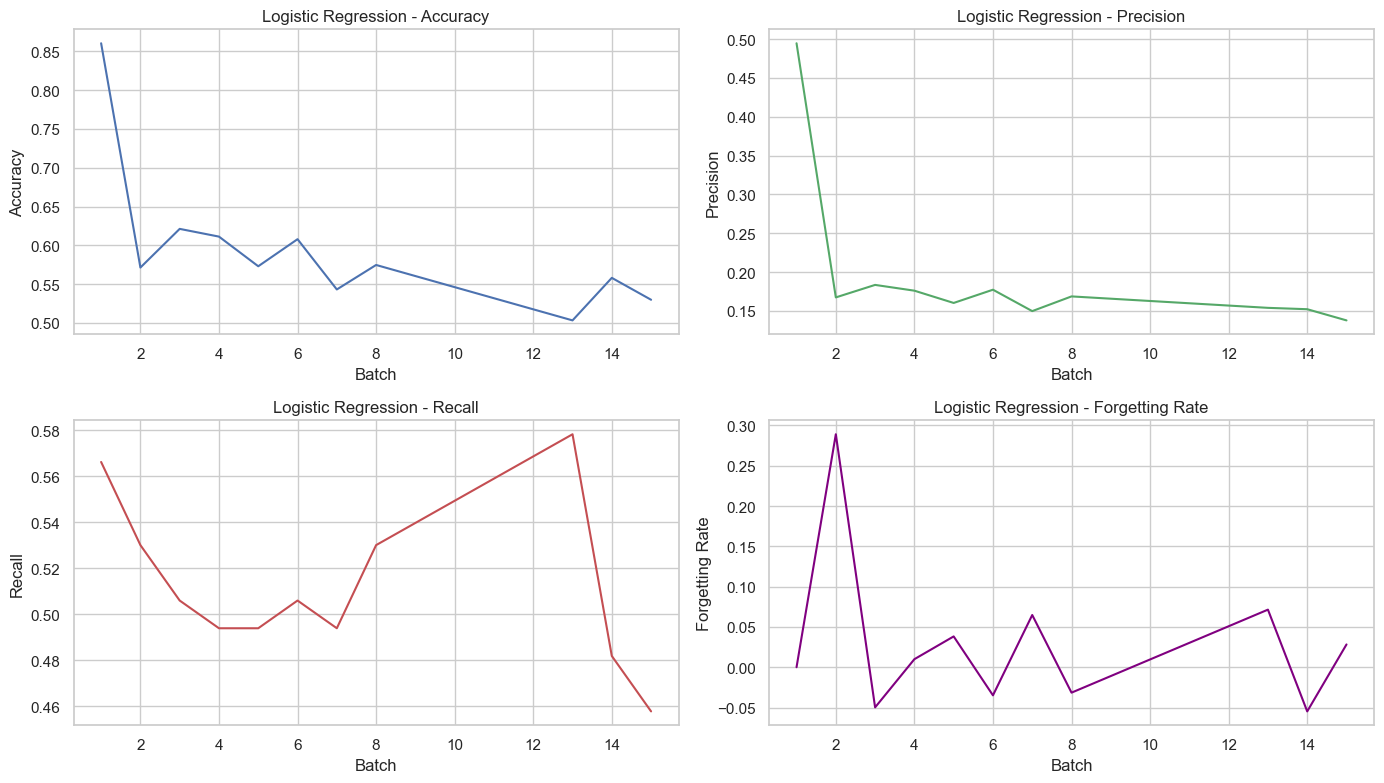

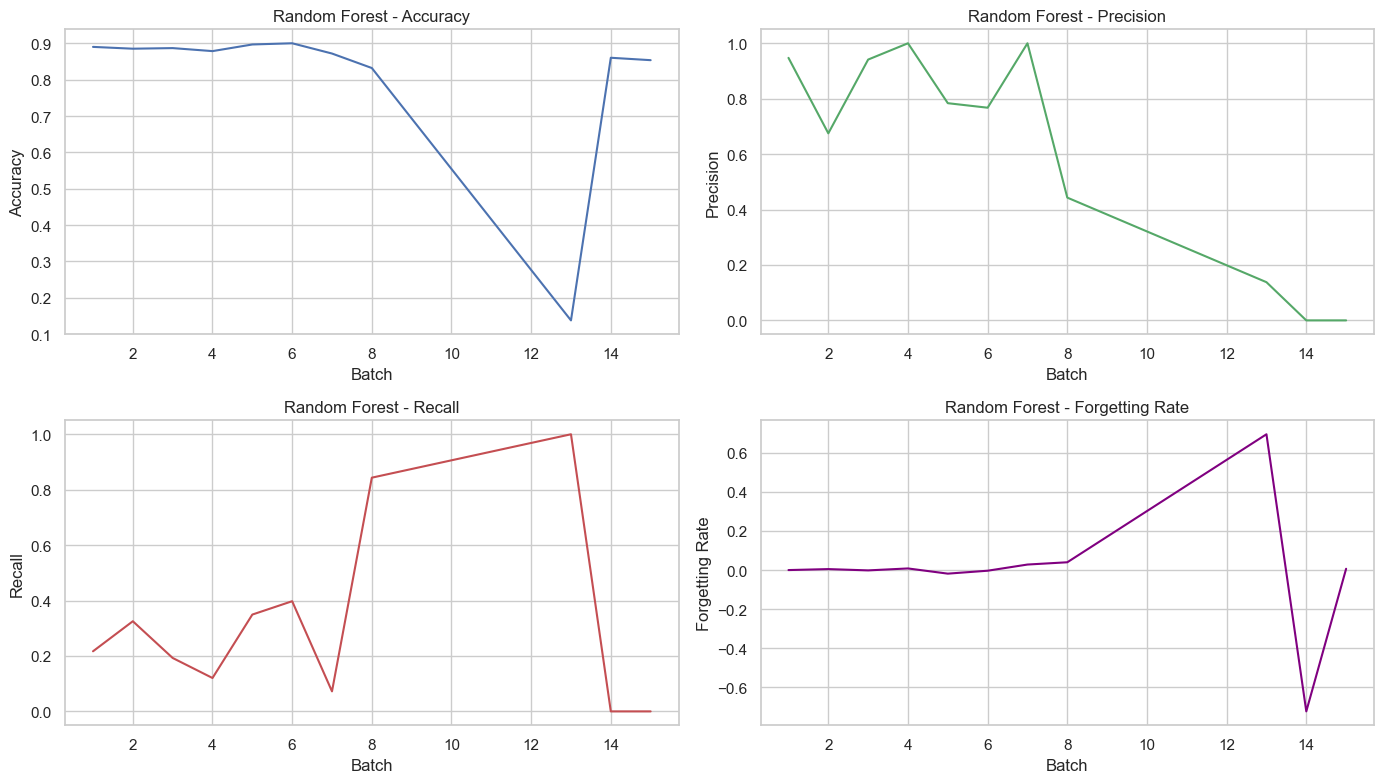

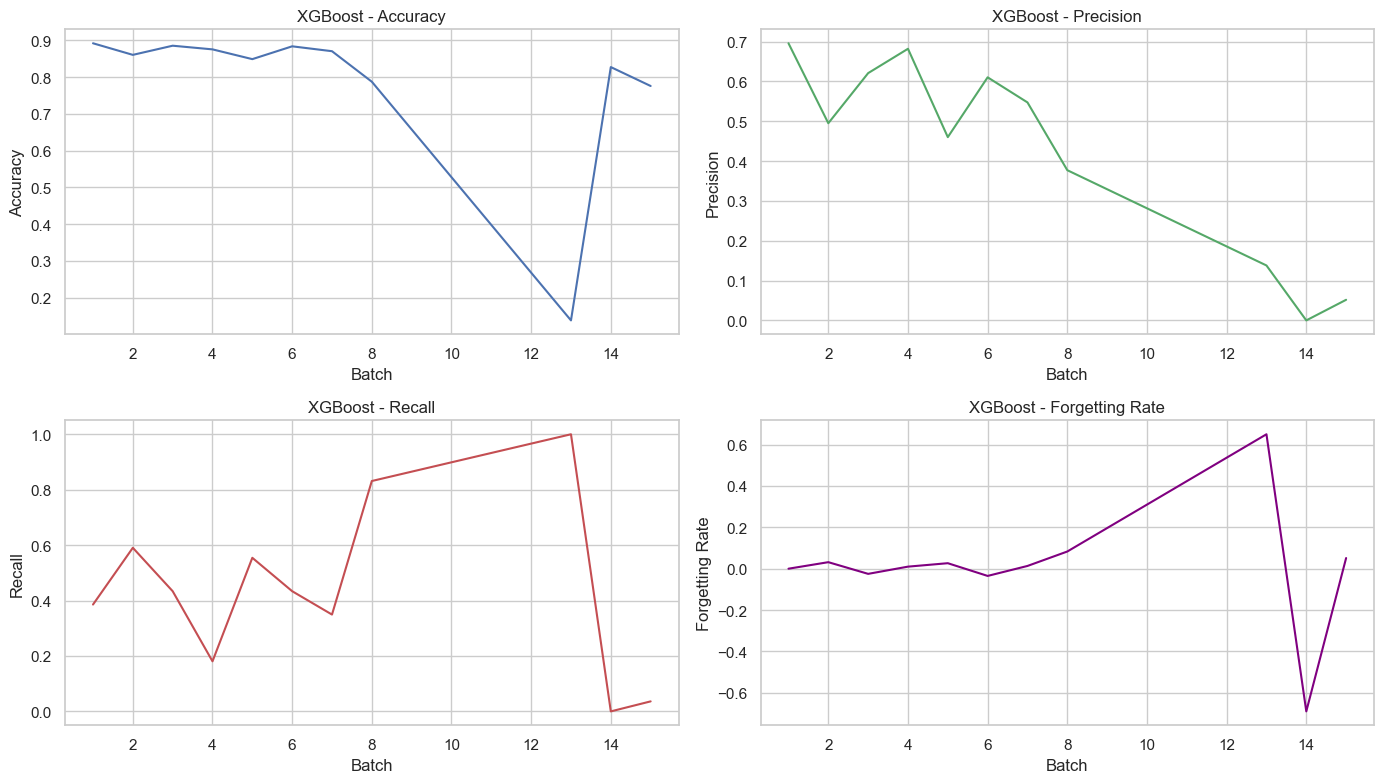

In [9]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho Logistic Regression
plt.figure(figsize=(14, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(logreg_df['Batch'], logreg_df['Accuracy'], label='Accuracy', color='b')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.title('Logistic Regression - Accuracy')
plt.grid(True)

# Precision
plt.subplot(2, 2, 2)
plt.plot(logreg_df['Batch'], logreg_df['Precision'], label='Precision', color='g')
plt.xlabel('Batch')
plt.ylabel('Precision')
plt.title('Logistic Regression - Precision')
plt.grid(True)

# Recall
plt.subplot(2, 2, 3)
plt.plot(logreg_df['Batch'], logreg_df['Recall'], label='Recall', color='r')
plt.xlabel('Batch')
plt.ylabel('Recall')
plt.title('Logistic Regression - Recall')
plt.grid(True)

# Forgetting Rate
plt.subplot(2, 2, 4)
plt.plot(logreg_df['Batch'], logreg_df['Forgetting Rate'], label='Forgetting Rate', color='purple')
plt.xlabel('Batch')
plt.ylabel('Forgetting Rate')
plt.title('Logistic Regression - Forgetting Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

# Vẽ biểu đồ cho Random Forest
plt.figure(figsize=(14, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(rf_df['Batch'], rf_df['Accuracy'], label='Accuracy', color='b')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.title('Random Forest - Accuracy')
plt.grid(True)

# Precision
plt.subplot(2, 2, 2)
plt.plot(rf_df['Batch'], rf_df['Precision'], label='Precision', color='g')
plt.xlabel('Batch')
plt.ylabel('Precision')
plt.title('Random Forest - Precision')
plt.grid(True)

# Recall
plt.subplot(2, 2, 3)
plt.plot(rf_df['Batch'], rf_df['Recall'], label='Recall', color='r')
plt.xlabel('Batch')
plt.ylabel('Recall')
plt.title('Random Forest - Recall')
plt.grid(True)

# Forgetting Rate
plt.subplot(2, 2, 4)
plt.plot(rf_df['Batch'], rf_df['Forgetting Rate'], label='Forgetting Rate', color='purple')
plt.xlabel('Batch')
plt.ylabel('Forgetting Rate')
plt.title('Random Forest - Forgetting Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

# Vẽ biểu đồ cho XGBoost
plt.figure(figsize=(14, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(xgb_df['Batch'], xgb_df['Accuracy'], label='Accuracy', color='b')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.title('XGBoost - Accuracy')
plt.grid(True)

# Precision
plt.subplot(2, 2, 2)
plt.plot(xgb_df['Batch'], xgb_df['Precision'], label='Precision', color='g')
plt.xlabel('Batch')
plt.ylabel('Precision')
plt.title('XGBoost - Precision')
plt.grid(True)

# Recall
plt.subplot(2, 2, 3)
plt.plot(xgb_df['Batch'], xgb_df['Recall'], label='Recall', color='r')
plt.xlabel('Batch')
plt.ylabel('Recall')
plt.title('XGBoost - Recall')
plt.grid(True)

# Forgetting Rate
plt.subplot(2, 2, 4)
plt.plot(xgb_df['Batch'], xgb_df['Forgetting Rate'], label='Forgetting Rate', color='purple')
plt.xlabel('Batch')
plt.ylabel('Forgetting Rate')
plt.title('XGBoost - Forgetting Rate')
plt.grid(True)

plt.tight_layout()
plt.show()
